In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable 

In [2]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [3]:
df = pd.read_csv("../data/7.dataframe_limpio.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q25_salario_new
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,Vim / Emacs,A laptop,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...",50-59,Man,India,Bachelor’s degree,Other,27499.5
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Python,"Notepad++,Jupyter Notebook","A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)",50-59,Man,Other,Master’s degree,Program/Project Manager,64999.5


In [4]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q7_l_utilizados', 'q8_l_recomendado', 'q9_adi',
       'q11_tipo_plataforma', 'q14_h_viz', 'q20_i_actual', 'q21_tamanio_cia',
       'q22_da_cia', 'q25_salario', 'q33_bigdata_product',
       'q41_h_process_data', 'q1_edad_new', 'q2_genero_new', 'q3_pais_new',
       'q4_educacion_new', 'q5_ocupacion_new', 'q25_salario_new'],
      dtype='object')

# 1. Perfil de los y las trabajadores en la ciencia de datos y el aprendizaje automático

In [5]:
df_perfil = df.drop(columns=['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion', 'q7_l_utilizados', 'q8_l_recomendado', 'q9_adi',
       'q11_tipo_plataforma', 'q14_h_viz', 'q20_i_actual', 'q21_tamanio_cia',
       'q22_da_cia', 'q33_bigdata_product',
       'q41_h_process_data', 'q25_salario_new'], axis=1)

In [6]:
df_perfil.head(2)

,q6_exp_tech,q25_salario,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new
0,5-10 years,"25,000-29,999",50-59,Man,India,Bachelor’s degree,Other
1,20+ years,"60,000-69,999",50-59,Man,Other,Master’s degree,Program/Project Manager


In [7]:
df_perfil.columns

Index(['q6_exp_tech', 'q25_salario', 'q1_edad_new', 'q2_genero_new',
       'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new'],
      dtype='object')

In [8]:
columnas_perfil= ['q1_edad_new', 'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new', 'q6_exp_tech']

In [53]:
def graficar_countplot (df,lista):

    df_lista = df[lista]
    fig, axes = plt.subplots(1, len(lista), figsize=(25,6))

    for ax in fig.axes:
        ax.tick_params(labelrotation=90)
        
    for i in range(len(df_lista.columns)):
        sns.set_theme(style="whitegrid")# grid
        sns.countplot(x = df_lista.columns[i], data = df, ax=axes[i],palette = 'Set2', hue="q2_genero_new")
    
    return plt.show();

## 1.1 Género

### ¿Cómo es la distribución por género? ¿Existe igualdad de género en el mundo de la ciencia de datos y el aprendizaje automático?

La gráfica evidencia la brecha de género en el mundo laboral, que se extrapola al mundo de los datos y machine learning.

In [10]:
df_genero = df.q2_genero.value_counts().reset_index()

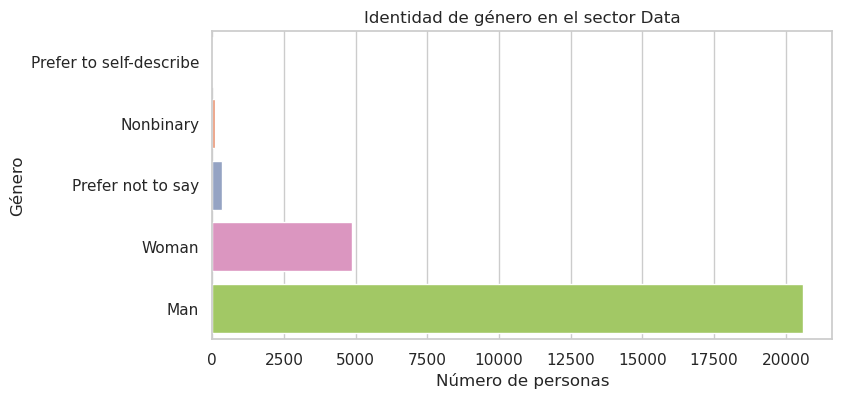

In [44]:
plt.figure(figsize=(8,4), dpi=100)
sns.set_theme(style="whitegrid")# grid
sns.barplot( y = "index" , x= "q2_genero" , 
            data=df_genero ,
            palette = 'Set2',
            order= ['Prefer to self-describe','Nonbinary','Prefer not to say', 'Woman','Man'])
plt.title('Identidad de género en el sector Data')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel('Género'); # definir el nombre del eje Y
plt.savefig("graficas/01-Identidad-genero.png")
plt.show();


## 1.2 Info general por género

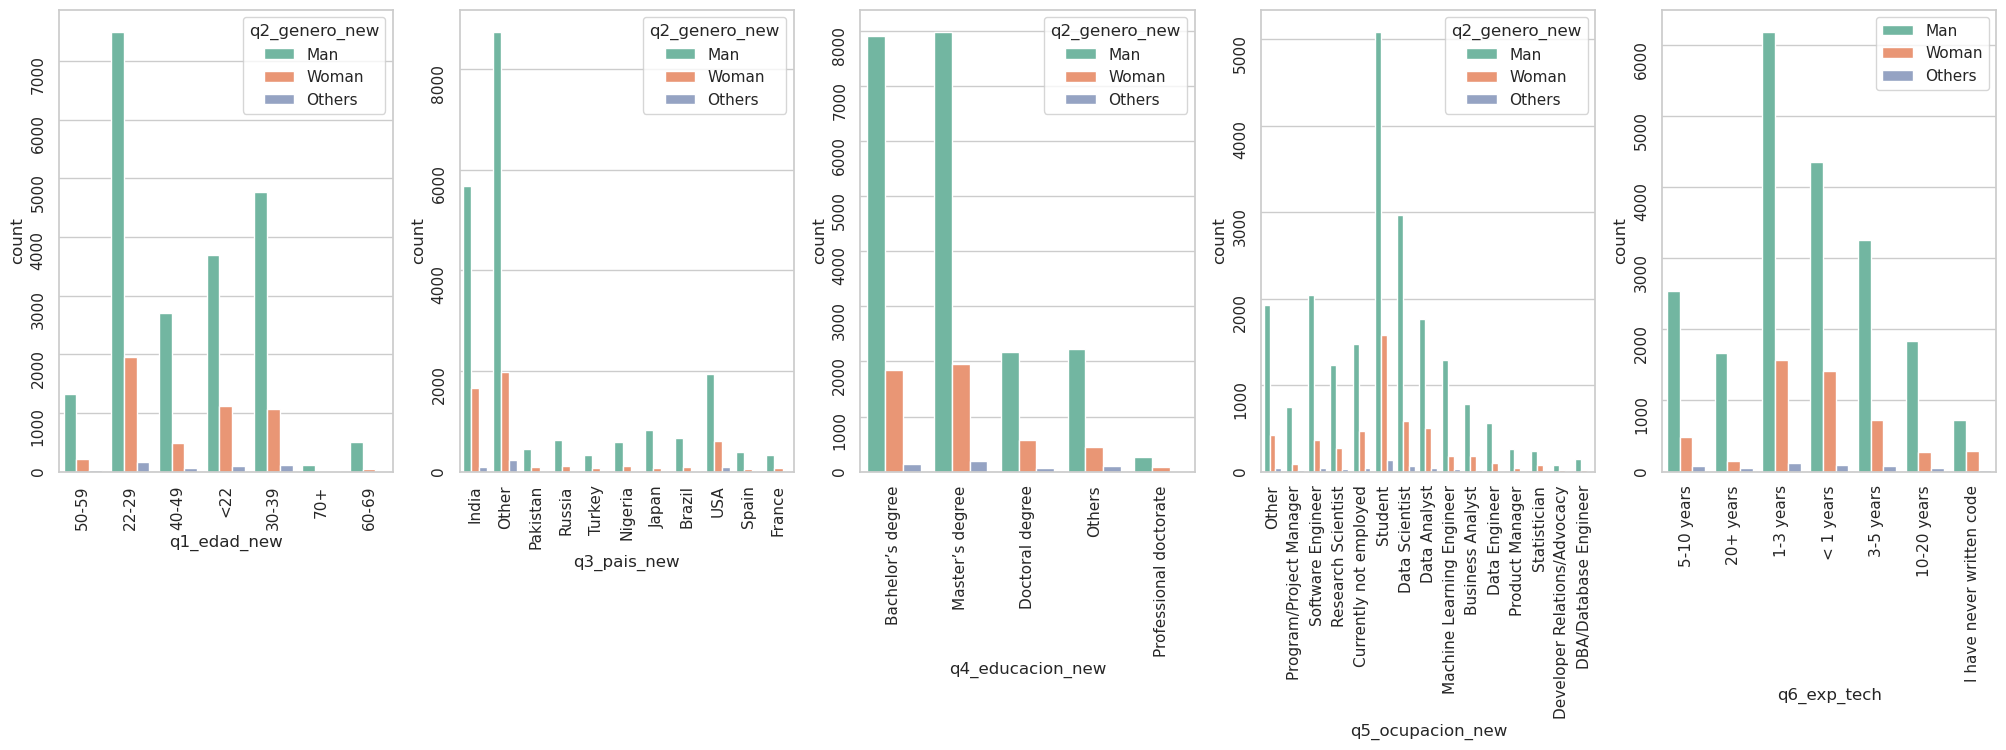

In [54]:
graficar_countplot(df_perfil,columnas_perfil)

Edad y género

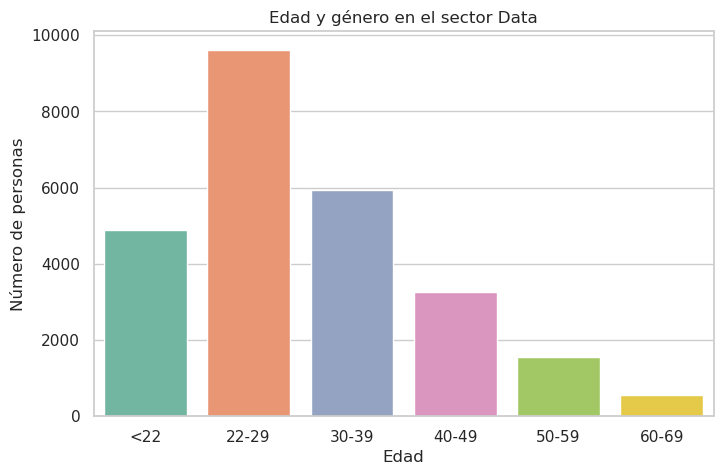

In [43]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(x= "q1_edad_new" , 
            data=df, 
            #hue= 'q2_genero_new',
            palette = 'Set2',
            order=['<22','22-29', '30-39', '40-49', '50-59', '60-69']
            )
plt.title('Edad y género en el sector Data')
plt.xlabel('Edad') # definir el nombre del eje X
plt.ylabel('Número de personas'); # definir el nombre del eje Y
plt.savefig("graficas/03-edad-genero.png")
plt.show();

Países y género

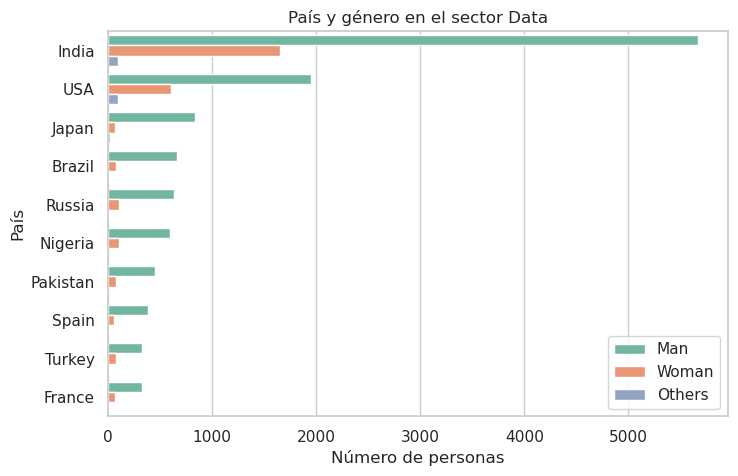

In [42]:
#sns.countplot(data=df , , hue=  "q2_genero_new");

plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= 'q3_pais_new' , 
            data=df, 
            hue= 'q2_genero_new',
            palette = 'Set2',
            order=['India', 'USA', 'Japan', 'Brazil', 'Russia', 'Nigeria','Pakistan', 'Spain', 'Turkey', 'France']
            )
plt.title('País y género en el sector Data')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("País"); # definir el nombre del eje Y
plt.legend((['Man','Woman','Others']))
plt.savefig("graficas/04-Pais-genero.png")
plt.show();

In [15]:
df_analistas = df[df['q5_ocupacion'] == 'Data Analyst']

In [16]:
df_analistas["q3_pais_new"].value_counts().index

Index(['Other', 'India', 'USA', 'Nigeria', 'Russia', 'Brazil', 'Japan',
       'Pakistan', 'France', 'Spain', 'Turkey'],
      dtype='object')

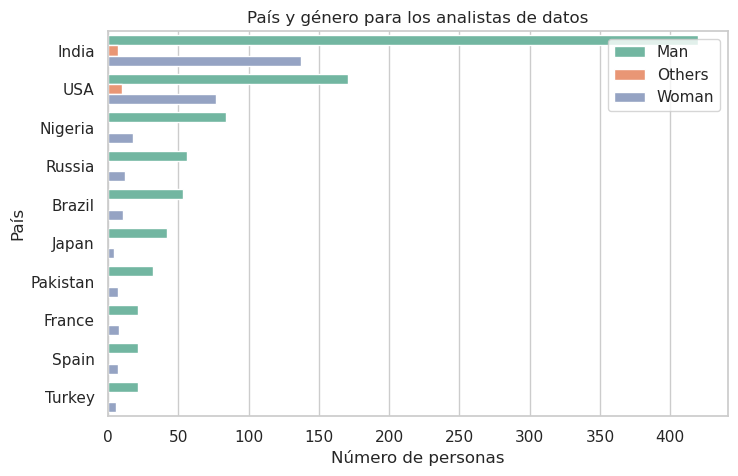

In [56]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= 'q3_pais_new' , 
            data=df_analistas, 
            hue= 'q2_genero_new',
            palette = 'Set2',
            order=['India', 'USA', 'Nigeria', 'Russia', 'Brazil', 'Japan',
                'Pakistan', 'France', 'Spain', 'Turkey']
            )
plt.title('País y género para los analistas de datos')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("País"); # definir el nombre del eje Y
plt.legend((['Man','Others','Woman']))
plt.savefig("graficas/05-pais-genero-data.png")
plt.show();

Educación

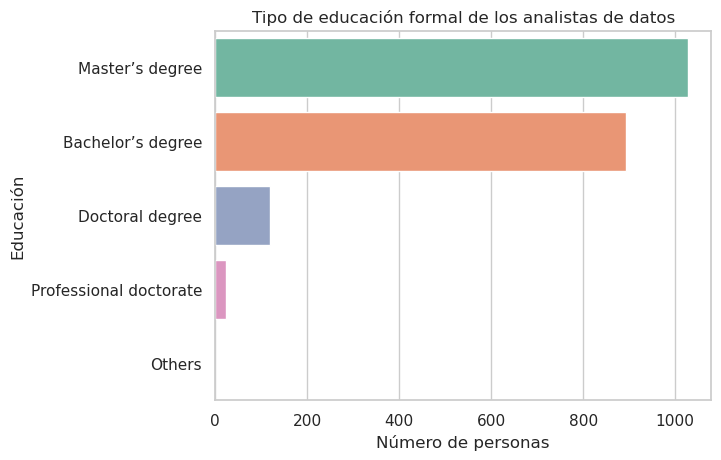

In [40]:
sns.set_theme(style="whitegrid")# grid
sns.countplot(y='q4_educacion', 
            data= df_analistas, 
            #hue = 'q2_genero_new', 
            palette = 'Set2', 
            order = ['Master’s degree', 'Bachelor’s degree',  'Doctoral degree','Professional doctorate', 'Others'] 
            );
plt.title('Tipo de educación formal de los analistas de datos')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("Educación"); # definir el nombre del eje Y
plt.savefig("graficas/06-educacion-data.png")

Ocupación y género

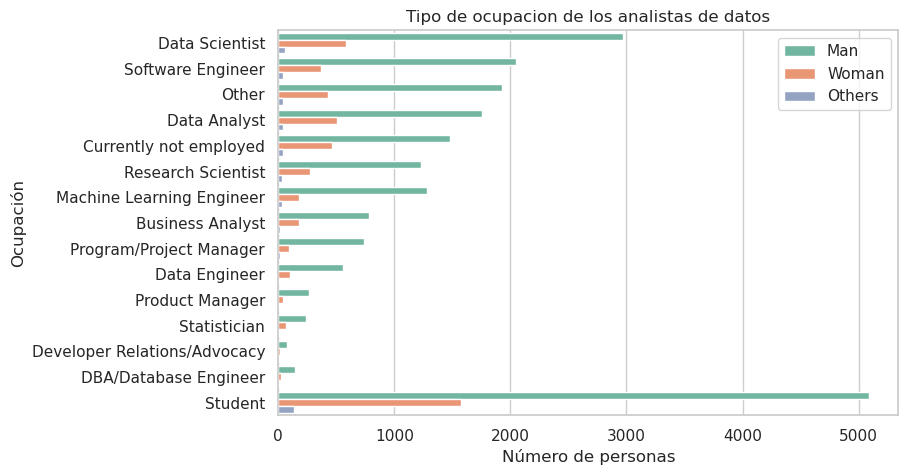

In [57]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(y= "q5_ocupacion_new", 
            data=df_perfil, 
            hue = "q2_genero_new", 
            palette = 'Set2',
            order=['Data Scientist', 'Software Engineer','Other','Data Analyst', 
                    'Currently not employed', 'Research Scientist', 'Machine Learning Engineer', 
                    'Business Analyst', 'Program/Project Manager', 'Data Engineer', 'Product Manager', 
                    'Statistician', 'Developer Relations/Advocacy', 'DBA/Database Engineer', 'Student']
            );
plt.title('Tipo de ocupacion de los analistas de datos')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel("Ocupación"); # definir el nombre del eje Y
plt.legend((['Man','Woman','Others']))
plt.savefig("graficas/07-Ocupacion-data.png")

No handles with labels found to put in legend.


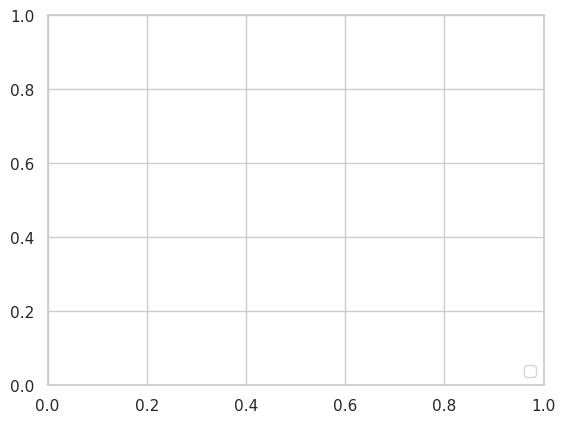

In [20]:
# Cambiar posición de leyenda
plt.legend(loc="lower right")


1.3 Ocupación y nivel de educación

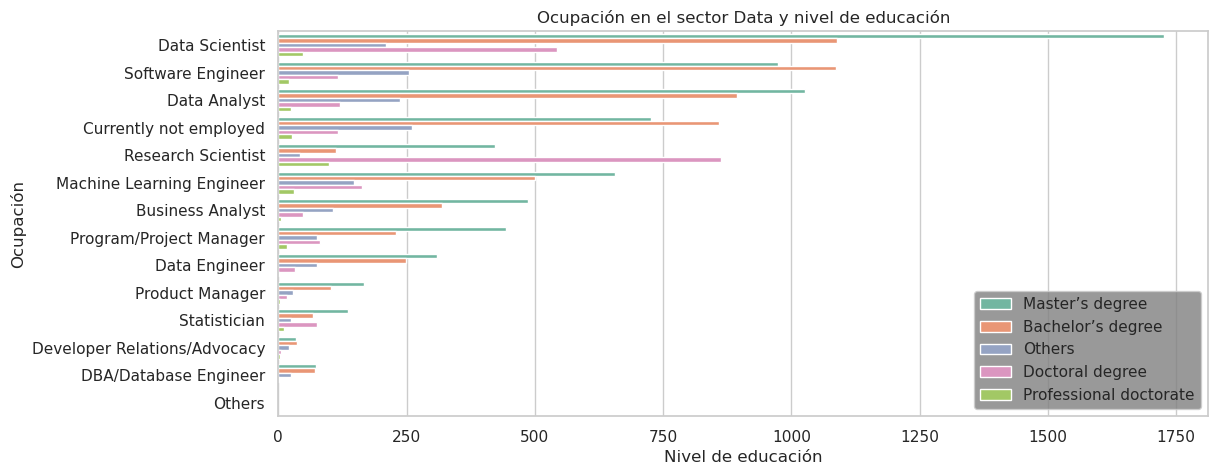

In [21]:
plt.figure(figsize= (12,5))
sns.countplot(y= "q5_ocupacion_new" , 
            data=df_perfil, 
            hue= 'q4_educacion_new',
            palette = 'Set2',
            order=['Data Scientist', 'Software Engineer','Data Analyst', 
                    'Currently not employed', 'Research Scientist', 'Machine Learning Engineer', 
                    'Business Analyst', 'Program/Project Manager', 'Data Engineer', 'Product Manager', 
                    'Statistician', 'Developer Relations/Advocacy', 'DBA/Database Engineer', "Others"],
            hue_order = ['Master’s degree', 'Bachelor’s degree', 'Others', 'Doctoral degree','Professional doctorate'])
plt.title('Ocupación en el sector Data y nivel de educación')
plt.xlabel('Nivel de educación') # definir el nombre del eje X
plt.ylabel('Ocupación') # definir el nombre del eje Y
plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/08-Ocupacion-educacion-data.png") 
plt.show();

In [22]:
# Para que salgan en orden en la gráfica, de mayor a menor presencia
df_analistas['q4_educacion_new'].value_counts().index

Index(['Master’s degree', 'Bachelor’s degree', 'Others', 'Doctoral degree',
       'Professional doctorate'],
      dtype='object')

1.3.1 Analistas de datos y nivel de educación

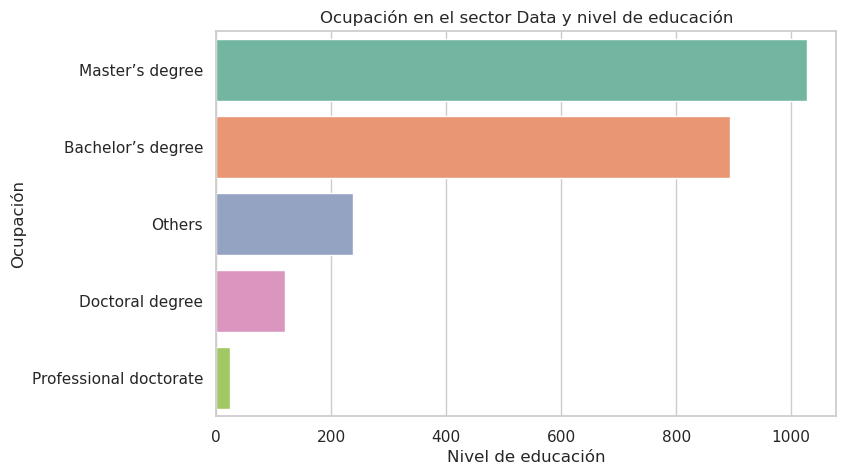

In [23]:
plt.figure(figsize= (8,5))
sns.countplot(y= 'q4_educacion_new' , 
            data=df_analistas, 
            #hue= "q5_ocupacion_new",
            palette = 'Set2',
            order=['Master’s degree', 'Bachelor’s degree', 'Others', 'Doctoral degree','Professional doctorate'])
plt.title('Ocupación en el sector Data y nivel de educación')
plt.xlabel('Nivel de educación') # definir el nombre del eje X
plt.ylabel('Ocupación'); # definir el nombre del eje Y
plt.savefig("graficas/08-Ocupacion-educacion-data.png")
plt.show();

In [24]:
df_perfil["q6_exp_tech"].value_counts().index

Index(['1-3 years', '< 1 years', '3-5 years', '5-10 years', '10-20 years',
       '20+ years', 'I have never written code'],
      dtype='object')

In [25]:
df_perfil["q2_genero_new"].value_counts().index

Index(['Man', 'Woman', 'Others'], dtype='object')

1.4 Años de experiencia y género

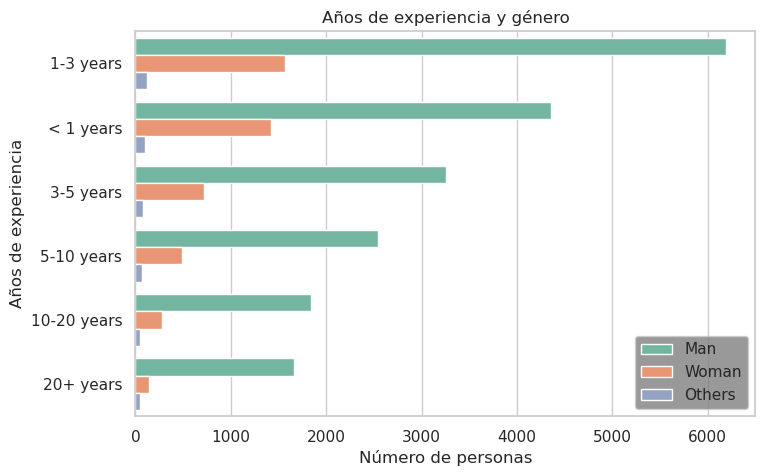

In [26]:
plt.figure(figsize= (8,5))
sns.countplot(y= 'q6_exp_tech' , 
            data=df_perfil, 
            hue= 'q2_genero_new',
            palette = 'Set2',
            order=['1-3 years', '< 1 years', '3-5 years', '5-10 years', '10-20 years','20+ years'],
            hue_order = ['Man', 'Woman', 'Others'])
            
plt.title('Años de experiencia y género')
plt.xlabel('Número de personas') # definir el nombre del eje X
plt.ylabel('Años de experiencia'); # definir el nombre del eje Y
plt.legend(facecolor='gray', loc="lower right")
plt.savefig("graficas/09-experiencia-genero.png")
plt.show();

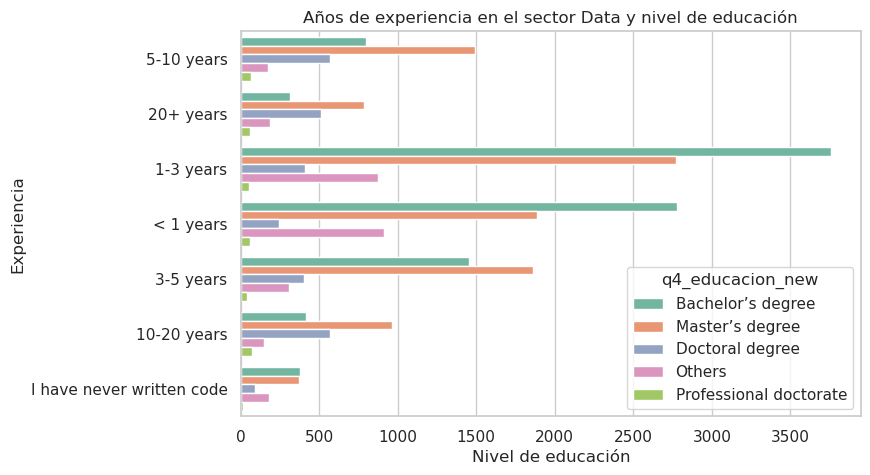

In [28]:
plt.figure(figsize= (8,5))
sns.countplot(y= 'q6_exp_tech' , 
            data=df, 
            hue= 'q4_educacion_new',
            palette = 'Set2')
            
plt.title('Años de experiencia en el sector Data y nivel de educación')
plt.xlabel('Nivel de educación') # definir el nombre del eje X
plt.ylabel('Experiencia'); # definir el nombre del eje Y
plt.savefig("graficas/10-ocupacion-educacion.png")
plt.show();

In [60]:
df2 = pd.read_csv("../data/8.dataframe_limpio.csv", index_col = 0)

# Se hace esto para resetear los índices
df2.reset_index(drop=True , inplace=True)
df2.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_num,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q25_salario_new,q25_salario_cat
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,Vim / Emacs,A laptop,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...",52.0,50-59,Man,India,Bachelor’s degree,Other,27499.5,30.000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Python,"Notepad++,Jupyter Notebook","A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)",52.0,50-59,Man,Other,Master’s degree,Program/Project Manager,64999.5,100.000


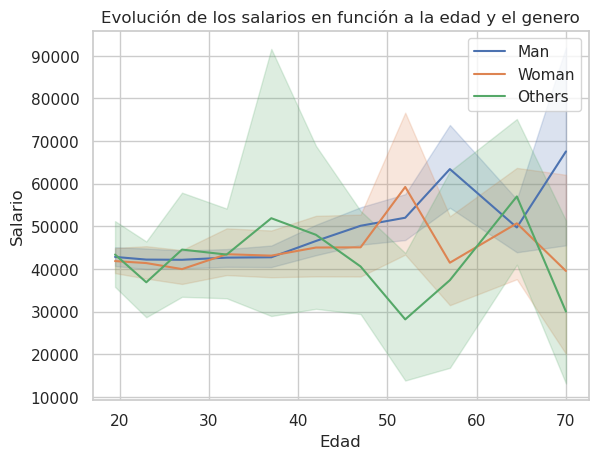

In [62]:
fig = sns.lineplot(x='q1_edad_num', y = 'q25_salario_new', data = df2, hue = 'q2_genero_new')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero')
plt.legend((['Man','Woman','Others']))
plt.savefig("graficas/10-10-experiencia-genero.png");

In [63]:
df2['q2_genero_new'] = df2['q2_genero_new'] != 'Others'

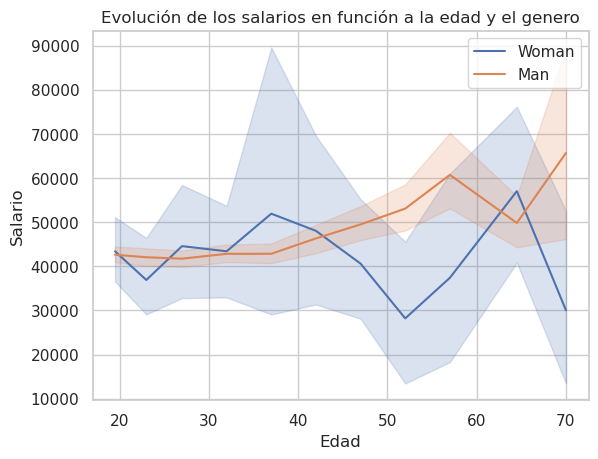

In [64]:
fig = sns.lineplot(x='q1_edad_num', y = 'q25_salario_new', data = df2, hue = 'q2_genero_new')
# cambiamos el nombre de los ejes
fig.set(xlabel='Edad', ylabel = 'Salario')
# ponemos título a la gráfica
fig.set_title('Evolución de los salarios en función a la edad y el genero')
plt.legend((['Woman','Man']))
plt.savefig("graficas/10-10-experiencia-genero.png");